In [10]:
import numpy as np
import cv2
import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
image=cv2.imread('aa.png')
image2=cv2.imread('dd.png')
cv2.imshow("Anh truy van",image)
cv2.imshow('Anh dao tao',image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
image1=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

In [12]:
orb=cv2.ORB_create()
kp1,descriptor1=orb.detectAndCompute(image1,None)
kp2,descriptor2=orb.detectAndCompute(image2,None)
print('Keypoint cua anh 1: ',len(kp1))
print('Keypoint cua anh 2: ',len(kp2))

Keypoint cua anh 1:  460
Keypoint cua anh 2:  500


In [13]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2
search_params = dict(checks=100)

2


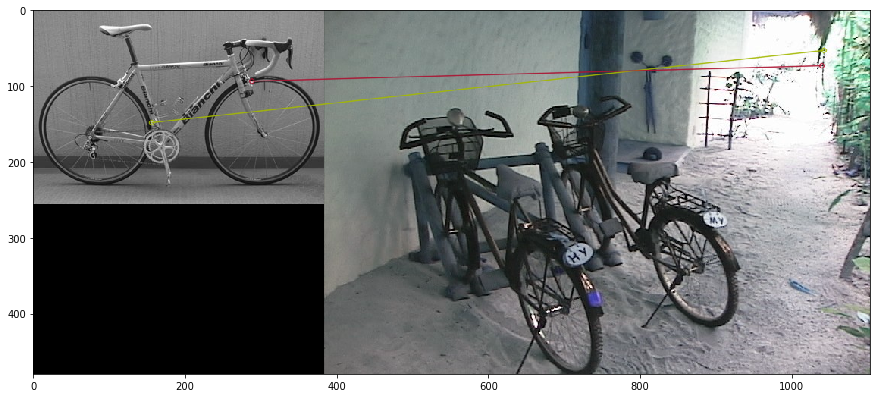

In [14]:
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(descriptor1,descriptor2,k=2)
good_matches=[]
#print(matches)
for m, n in matches:
    if m.distance<=0.7*n.distance:
        good_matches.append(m)
print(len(good_matches))
image3=cv2.drawMatches(image1,kp1,image2,kp2,good_matches,None,flags=2)
fig=plt.figure(figsize=(15,15))
plt.imshow(image3)
plt.show()

In [15]:
results={}
flann = cv2.FlannBasedMatcher(index_params,search_params)
for des_path in glob.glob('Descriptors/*'):
    good_matches=[]
    ImageID=des_path[des_path.rfind("\\")+1:].split('.')[0]
    desriptor=np.load(des_path,'r')
    matches = flann.knnMatch(descriptor1,desriptor,k=2)
    #print(matches)
    for list_result in matches:
        if len(list_result)==2:
            if list_result[0].distance<=0.7*list_result[1].distance:
                good_matches.append(list_result[0].distance)
    results[ImageID]=len(good_matches)
results=sorted([(v,k) for (k,v) in results.items()],reverse=True)

In [16]:
for (v,k) in results:
    print('ID Anh:',k)
    print('So diem anh khoang cach:',v)

ID Anh: homepage2niftycomhosonumabicyclepantanitdfIMG12741
So diem anh khoang cach: 443
ID Anh: wwwreddirtpedalerscomBicycle20Picture20ArchiveMarybike
So diem anh khoang cach: 9
ID Anh: photos1bloggercomimg1741145320BLUE20BICYCLE20IAG
So diem anh khoang cach: 7
ID Anh: wwwfredmirandacomhostingdata50132827bluebicyclefm
So diem anh khoang cach: 6
ID Anh: wwwbeevillenetBicycleclassic2004PhotosBeevilleBeeCountyHTEBicycleClassic2004P7106564small
So diem anh khoang cach: 5
ID Anh: wwwbeautifullandscapecomNew20SitedataPrints20of20the20monthBicycle500
So diem anh khoang cach: 5
ID Anh: wwwaea1k12iausnwinnPictures2020032004Bicycle20RodeoBicycle20RodeoImages9
So diem anh khoang cach: 5
ID Anh: yfieldcomveralucbicycle2desert
So diem anh khoang cach: 4
ID Anh: wwwyasukawacommamiarchivesimagesbicycle0429
So diem anh khoang cach: 4
ID Anh: wwwrivendellbicyclescomimagesbikesmainatlantis2
So diem anh khoang cach: 4
ID Anh: wwwmontanaeduwwwmsupdimagesbikereg
So diem anh khoang cach: 4
ID Anh: wwwibizas

In [17]:
r1=cv2.imread('bicycle/'+results[0][1]+'.png')
r2=cv2.imread('bicycle/'+results[1][1]+'.png')
r3=cv2.imread('bicycle/'+results[2][1]+'.png')
r4=cv2.imread('bicycle/'+results[3][1]+'.png')
cv2.imshow('Query Image',image)
cv2.imshow('R1',r1)
cv2.imshow('R2',r2)
cv2.imshow('R3',r3)
cv2.imshow('R4',r4)
cv2.waitKey(0)
cv2.destroyAllWindows()